## Data collection

In [ ]:
for i in range(0, 0): # former range was (0, 49)
    
    start_page = i*20

    params = {
      "api_key": "", # removed key for security reasons
      "device": "desktop",
      "engine": "google_scholar",
      "q": "artificial intelligence climate change",
      "hl": "en",
      "scisbd": "0",
      "num": "20",
      "start": str(start_page)
    }

    search = GoogleSearch(params)
    results = search.get_dict()
    
    results_filename = "data/results" + str(i) + ".json"
    
    with open(results_filename, "w") as results_file:
        json.dump(results, results_file)
    
    print("printed: " + results_filename)

## Data reading and preprocessing

In [2]:
import json

organic_results = []
organic_results_authors = []
organic_results_summary = []

for i in range(0, 49):
    
    start_page = i*20
    results_filename = "data/results" + str(i) + ".json"

    with open(results_filename) as results_file:
        results_dict = json.load(results_file)

    for j in range(len(results_dict["organic_results"])):
        results_dict["organic_results"][j]["position"] = start_page + j
        organic_results.append(results_dict["organic_results"][j])
        
        if len(results_dict["organic_results"][j]["publication_info"]) > 1:
            organic_results_authors.append(results_dict["organic_results"][j])
            print("added paper no.", str(start_page + j), "to authors")
        else:
            organic_results_summary.append(results_dict["organic_results"][j])
            print("added paper no.", str(start_page + j), "to summary")
        
    print("\n")

added paper no. 0 to authors
added paper no. 1 to authors
added paper no. 2 to authors
added paper no. 3 to authors
added paper no. 4 to authors
added paper no. 5 to authors
added paper no. 6 to authors
added paper no. 7 to summary
added paper no. 8 to authors
added paper no. 9 to authors
added paper no. 10 to authors
added paper no. 11 to authors
added paper no. 12 to authors
added paper no. 13 to authors
added paper no. 14 to authors
added paper no. 15 to authors
added paper no. 16 to authors
added paper no. 17 to summary
added paper no. 18 to authors
added paper no. 19 to summary


added paper no. 20 to authors
added paper no. 21 to authors
added paper no. 22 to authors
added paper no. 23 to authors
added paper no. 24 to authors
added paper no. 25 to authors
added paper no. 26 to summary
added paper no. 27 to summary
added paper no. 28 to authors
added paper no. 29 to authors
added paper no. 30 to authors
added paper no. 31 to authors
added paper no. 32 to authors
added paper no. 33

In [3]:
papers = []
authors = {}

for i in range(len(organic_results)):
    print("---> started analyzing paper no.", str(i))
    
    paper = {}
    
    paper["position"] = organic_results[i]["position"]
    paper["title"] = organic_results[i]["title"]
    paper["result_id"] = organic_results[i]["result_id"]
    
    if "link" in organic_results[i].keys():
        paper["link"] = organic_results[i]["link"]

    paper["snippet"] = organic_results[i]["snippet"]
    
    paper["pi_summary"] = organic_results[i]["publication_info"]["summary"]
    author_names = []
    author_links = []
    author_serpapi_scholar_links = []
    author_author_ids = []
    author_count = 0
    
    if len(organic_results[i]["publication_info"]) > 1:
        for j in range(len(organic_results[i]["publication_info"]["authors"])):
            author_names.append(organic_results[i]["publication_info"]["authors"][j]["name"])
            author_links.append(organic_results[i]["publication_info"]["authors"][j]["link"])
            author_serpapi_scholar_links.append(organic_results[i]["publication_info"]["authors"][j]["serpapi_scholar_link"])
            author_author_ids.append(organic_results[i]["publication_info"]["authors"][j]["author_id"])
            
            if organic_results[i]["publication_info"]["authors"][j]["author_id"] not in authors.keys():
                author = {}
            
                author["name"] = organic_results[i]["publication_info"]["authors"][j]["name"]
                author["link"] = organic_results[i]["publication_info"]["authors"][j]["link"]
                author["serpapi_scholar_link"] = organic_results[i]["publication_info"]["authors"][j]["serpapi_scholar_link"]
                author["author_id"] = organic_results[i]["publication_info"]["authors"][j]["author_id"]
                author["papers"] = []
                
                authors[organic_results[i]["publication_info"]["authors"][j]["author_id"]] = author
                
                print("new author", organic_results[i]["publication_info"]["authors"][j]["author_id"], "added at no.", str(len(authors)))
            
            author_paper = {}
                
            author_paper["position"] = organic_results[i]["position"]
            author_paper["result_id"] = organic_results[i]["result_id"]
            author_paper["authorship_order"] = j
            
            authors[organic_results[i]["publication_info"]["authors"][j]["author_id"]]["papers"].append(author_paper)
                
            print("new paper no.", str(organic_results[i]["position"]), "added to the author", organic_results[i]["publication_info"]["authors"][j]["author_id"])
            
        author_count = len(organic_results[i]["publication_info"]["authors"])
            
    paper["pi_author_names"] = author_names
    paper["pi_author_links"] = author_links
    paper["pi_author_serpapi_scholar_links"] = author_serpapi_scholar_links
    paper["pi_author_author_ids"] = author_author_ids
    paper["pi_author_count"] = author_count
    
    resource_titles = []
    resource_file_formats = []
    resource_links = []
    
    if "resources" in organic_results[i].keys():
        for k in range(len(organic_results[i]["resources"])):
            resource_titles.append(organic_results[i]["resources"][k]["title"])
            resource_links.append(organic_results[i]["resources"][k]["link"])
            if "file_format" in organic_results[i]["resources"][k].keys():
                resource_file_formats.append(organic_results[i]["resources"][k]["file_format"])
    
    paper["r_title"] = resource_titles
    paper["r_file_format"] = resource_file_formats
    paper["r_link"] = resource_links
    
    paper["il_serpapi_cite_link"] = organic_results[i]["inline_links"]["serpapi_cite_link"]
    
    if "cited_by" in organic_results[i]["inline_links"].keys():
        paper["il_cb_total"] = organic_results[i]["inline_links"]["cited_by"]["total"]
        paper["il_cb_link"] = organic_results[i]["inline_links"]["cited_by"]["link"]
        
        if "cites_id" in organic_results[i]["inline_links"]["cited_by"].keys():
            paper["il_cb_cites_id"] = organic_results[i]["inline_links"]["cited_by"]["cites_id"]
            
        if "serpapi_scholar_link" in organic_results[i]["inline_links"]["cited_by"].keys():
            paper["il_cb_serpapi_scholar_link"] = organic_results[i]["inline_links"]["cited_by"]["serpapi_scholar_link"]
    
    if "related_pages_link" in organic_results[i]["inline_links"].keys():
        paper["il_related_pages_link"] = organic_results[i]["inline_links"]["related_pages_link"]

    if "serpapi_related_pages_link" in organic_results[i]["inline_links"].keys():
        paper["il_serpapi_related_pages_link"] = organic_results[i]["inline_links"]["serpapi_related_pages_link"]
    
    if "versions" in organic_results[i]["inline_links"].keys():
        paper["il_v_total"] = organic_results[i]["inline_links"]["versions"]["total"]
        paper["il_v_link"] = organic_results[i]["inline_links"]["versions"]["link"]
        paper["il_v_cluster_id"] = organic_results[i]["inline_links"]["versions"]["cluster_id"]
        paper["il_v_serpapi_scholar_link"] = organic_results[i]["inline_links"]["versions"]["serpapi_scholar_link"]
    
    papers.append(paper)
    
    print("new paper", str(organic_results[i]["position"]), "added\n")

---> started analyzing paper no. 0
new author jsy-VxMAAAAJ added at no. 1
new paper no. 0 added to the author jsy-VxMAAAAJ
new author PfRSkfEAAAAJ added at no. 2
new paper no. 0 added to the author PfRSkfEAAAAJ
new author UCDMtM0AAAAJ added at no. 3
new paper no. 0 added to the author UCDMtM0AAAAJ
new paper 0 added

---> started analyzing paper no. 1
new author 5FbmU30AAAAJ added at no. 4
new paper no. 1 added to the author 5FbmU30AAAAJ
new author ExvifmMAAAAJ added at no. 5
new paper no. 1 added to the author ExvifmMAAAAJ
new author ZUGDtC4AAAAJ added at no. 6
new paper no. 1 added to the author ZUGDtC4AAAAJ
new author jZdTOaoAAAAJ added at no. 7
new paper no. 1 added to the author jZdTOaoAAAAJ
new paper 1 added

---> started analyzing paper no. 2
new author MX2ayBMAAAAJ added at no. 8
new paper no. 2 added to the author MX2ayBMAAAAJ
new paper 2 added

---> started analyzing paper no. 3
new author aQTkdNEAAAAJ added at no. 9
new paper no. 3 added to the author aQTkdNEAAAAJ
new author 

In [4]:
authors_list = []

for key in authors.keys():
    authors[key]["paper_count"] = len(authors[key]["papers"])
    
    paper_positions = []
    paper_result_ids = []
    paper_authorship_orders = []
    
    for i in range(len(authors[key]["papers"])):
        paper_positions.append(authors[key]["papers"][i]["position"])
        paper_result_ids.append(authors[key]["papers"][i]["result_id"])
        paper_authorship_orders.append(authors[key]["papers"][i]["authorship_order"])
        
    authors[key]["paper_positions"] = paper_positions
    authors[key]["paper_result_ids"] = paper_result_ids
    authors[key]["paper_authorship_orders"] = paper_authorship_orders
    
    authors[key].pop("papers", None)
    
    authors_list.append(authors[key])

In [5]:
import pandas as pd

authors_df = pd.DataFrame.from_records(authors_list)

papers_df = pd.DataFrame.from_records(papers)

In [6]:
authors_df

,name,link,serpapi_scholar_link,author_id,paper_count,paper_positions,paper_result_ids,paper_authorship_orders
0,LH Kaack,https://scholar.google.com/citations?user=jsy-...,https://serpapi.com/search.json?author_id=jsy-...,jsy-VxMAAAAJ,4,"[0, 31, 41, 639]","[CqTUOavVW0kJ, 8rJIdq7KXe8J, A1RiaXuSFgsJ, Hlt...","[0, 2, 0, 0]"
1,PL Donti,https://scholar.google.com/citations?user=PfRS...,https://serpapi.com/search.json?author_id=PfRS...,PfRSkfEAAAAJ,6,"[0, 31, 41, 191, 639, 667]","[CqTUOavVW0kJ, 8rJIdq7KXe8J, A1RiaXuSFgsJ, rFV...","[1, 1, 1, 0, 1, 1]"
2,E Strubell,https://scholar.google.com/citations?user=UCDM...,https://serpapi.com/search.json?author_id=UCDM...,UCDMtM0AAAAJ,2,"[0, 41]","[CqTUOavVW0kJ, A1RiaXuSFgsJ]","[2, 2]"
3,J Cowls,https://scholar.google.com/citations?user=5Fbm...,https://serpapi.com/search.json?author_id=5Fbm...,5FbmU30AAAAJ,2,"[1, 18]","[qZ9lShz17X8J, vAdL7tnQSBYJ]","[0, 2]"
4,A Tsamados,https://scholar.google.com/citations?user=Exvi...,https://serpapi.com/search.json?author_id=Exvi...,ExvifmMAAAAJ,2,"[1, 18]","[qZ9lShz17X8J, vAdL7tnQSBYJ]","[1, 1]"
...,...,...,...,...,...,...,...,...
1146,H Nampak,https://scholar.google.com/citations?user=SiQ6...,https://serpapi.com/search.json?author_id=SiQ6...,SiQ6GE8AAAAJ,1,[978],[vgEVjo_ngtcJ],[2]
1147,V Eyring,https://scholar.google.com/citations?user=Y3i8...,https://serpapi.com/search.json?author_id=Y3i8...,Y3i87foAAAAJ,1,[979],[ssZ_KS8xjW4J],[0]
1148,V Mishra,https://scholar.google.com/citations?user=wq7C...,https://serpapi.com/search.json?author_id=wq7C...,wq7CgpUAAAAJ,1,[979],[ssZ_KS8xjW4J],[1]
1149,GP Griffith,https://scholar.google.com/citations?user=ar4I...,https://serpapi.com/search.json?author_id=ar4I...,ar4IeY0AAAAJ,1,[979],[ssZ_KS8xjW4J],[2]


In [7]:
len(authors_df["author_id"].unique())

1151

In [8]:
papers_df

,position,title,result_id,link,snippet,pi_summary,pi_author_names,pi_author_links,pi_author_serpapi_scholar_links,pi_author_author_ids,...,il_cb_total,il_cb_link,il_cb_cites_id,il_cb_serpapi_scholar_link,il_related_pages_link,il_serpapi_related_pages_link,il_v_total,il_v_link,il_v_cluster_id,il_v_serpapi_scholar_link
0,0,Aligning artificial intelligence with climate ...,CqTUOavVW0kJ,https://www.nature.com/articles/s41558-022-013...,… the growth of artificial intelligence and ma...,"LH Kaack, PL Donti, E Strubell, G Kamiya… - … ...","[LH Kaack, PL Donti, E Strubell]",[https://scholar.google.com/citations?user=jsy...,[https://serpapi.com/search.json?author_id=jsy...,"[jsy-VxMAAAAJ, PfRSkfEAAAAJ, UCDMtM0AAAAJ]",...,19.0,https://scholar.google.com/scholar?cites=52860...,5286053519035769866,https://serpapi.com/search.json?as_sdt=5%2C47&...,https://scholar.google.com/scholar?q=related:C...,https://serpapi.com/search.json?as_sdt=0%2C47&...,2.0,https://scholar.google.com/scholar?cluster=528...,5286053519035769866,https://serpapi.com/search.json?as_sdt=0%2C47&...
1,1,The AI gambit: leveraging artificial intellige...,qZ9lShz17X8J,https://link.springer.com/article/10.1007/s001...,… the role that artificial intelligence (AI) c...,"J Cowls, A Tsamados, M Taddeo, L Floridi - Ai ...","[J Cowls, A Tsamados, M Taddeo, L Floridi]",[https://scholar.google.com/citations?user=5Fb...,[https://serpapi.com/search.json?author_id=5Fb...,"[5FbmU30AAAAJ, ExvifmMAAAAJ, ZUGDtC4AAAAJ, jZd...",...,33.0,https://scholar.google.com/scholar?cites=92182...,9218293514153336745,https://serpapi.com/search.json?as_sdt=5%2C47&...,https://scholar.google.com/scholar?q=related:q...,https://serpapi.com/search.json?as_sdt=0%2C47&...,10.0,https://scholar.google.com/scholar?cluster=921...,9218293514153336745,https://serpapi.com/search.json?as_sdt=0%2C47&...
2,2,Artificial intelligence and climate change,YxE_RYUiZSAJ,https://heinonline.org/hol-cgi-bin/get_pdf.cgi...,"… Climate change is one such complex problem, ...","AL Stein - Yale J. on Reg., 2020 - HeinOnline",[AL Stein],[https://scholar.google.com/citations?user=MX2...,[https://serpapi.com/search.json?author_id=MX2...,[MX2ayBMAAAAJ],...,30.0,https://scholar.google.com/scholar?cites=23343...,2334309937649226083,https://serpapi.com/search.json?as_sdt=5%2C47&...,https://scholar.google.com/scholar?q=related:Y...,https://serpapi.com/search.json?as_sdt=0%2C47&...,7.0,https://scholar.google.com/scholar?cluster=233...,2334309937649226083,https://serpapi.com/search.json?as_sdt=0%2C47&...
3,3,Deploying artificial intelligence for climate ...,ZR-Ije0YL-YJ,https://www.sciencedirect.com/science/article/...,… Artificial Intelligence (AI) is believed to ...,"W Leal Filho, T Wall, SAR Mucova, GJ Nagy… - …...","[W Leal Filho, T Wall, SAR Mucova, GJ Nagy]",[https://scholar.google.com/citations?user=aQT...,[https://serpapi.com/search.json?author_id=aQT...,"[aQTkdNEAAAAJ, Iz4829EAAAAJ, UtavuVIAAAAJ, aF6...",...,10.0,https://scholar.google.com/scholar?cites=16586...,16586503361189650277,https://serpapi.com/search.json?as_sdt=5%2C47&...,https://scholar.google.com/scholar?q=related:Z...,https://serpapi.com/search.json?as_sdt=0%2C47&...,8.0,https://scholar.google.com/scholar?cluster=165...,16586503361189650277,https://serpapi.com/search.json?as_sdt=0%2C47&...
4,4,Machine learning and artificial intelligence t...,KScUXRYGPAAJ,https://iopscience.iop.org/article/10.1088/174...,… interact safely with climate change. There i...,"C Huntingford, ES Jeffers, MB Bonsall… - Envir...",[ES Jeffers],[https://scholar.google.com/citations?user=dsm...,[https://serpapi.com/search.json?author_id=dsm...,[dsm4WsAAAAAJ],...,149.0,https://scholar.google.com/scholar?cites=16895...,16895191723288361,https://serpapi.com/search.json?as_sdt=5%2C47&...,https://scholar.google.com/scholar?q=related:K...,https://serpapi.com/search.json?as_sdt=0%2C47&...,12.0,https://scholar.google.com/scholar?cluster=168...,16895191723288361,https://serpapi.com/search.json?as_sdt=0%2C47&...


## Data cleaning

In [248]:
# duplicate_pairs = []

# for d in papers_duplicates:
#     pair = []
#     for p in papers:
#         if p["title"] == d:
#             pair.append(p["position"])
#     duplicate_pairs.append(pair)
    
# duplicate_pairs

[[668, 698, 707],
 [837, 846],
 [770, 934],
 [618, 626],
 [619, 627],
 [397, 400],
 [156, 329],
 [799, 810],
 [798, 809],
 [797, 808],
 [796, 807],
 [884, 885],
 [795, 806],
 [794, 805],
 [793, 804],
 [792, 803],
 [791, 802],
 [616, 624],
 [790, 801],
 [559, 567],
 [537, 962],
 [558, 566],
 [557, 565],
 [556, 564],
 [555, 563],
 [554, 562],
 [836, 845],
 [553, 561],
 [552, 560],
 [79, 81],
 [78, 80],
 [399, 402],
 [617, 625],
 [398, 401],
 [279, 280],
 [615, 623],
 [690, 700],
 [691, 701],
 [692, 702],
 [693, 703],
 [694, 704],
 [695, 705],
 [696, 706],
 [238, 436],
 [832, 841],
 [699, 708],
 [833, 842],
 [834, 843],
 [835, 844],
 [839, 848],
 [838, 847],
 [853, 861],
 [831, 840],
 [614, 622],
 [270, 281],
 [359, 361],
 [358, 360],
 [612, 620],
 [613, 621]]

In [252]:
# for dp in duplicate_pairs[:1]:
#     x = papers[dp[0]]
#     y = papers[dp[1]]
#     diff = {k: x[k] for k in x if k not in y or x[k] != y[k]}
#     print(diff.keys())

dict_keys(['position', 'result_id', 'link', 'snippet', 'pi_summary', 'pi_author_names', 'pi_author_links', 'pi_author_serpapi_scholar_links', 'pi_author_author_ids', 'pi_author_count', 'il_serpapi_cite_link', 'il_related_pages_link', 'il_serpapi_related_pages_link', 'il_v_total', 'il_v_link', 'il_v_cluster_id', 'il_v_serpapi_scholar_link'])


In [9]:
papers_df_uniques = papers_df.groupby("title",sort=False).max().sort_values("pi_author_count", ascending=False)

papers_w_authors = papers_df_uniques[papers_df_uniques["pi_author_count"] > 0]

papers_w_authors

/tmp/ipykernel_7789/2888694461.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  papers_df_uniques = papers_df.groupby("title",sort=False).max().sort_values("pi_author_count", ascending=False)


,position,result_id,snippet,pi_summary,pi_author_names,pi_author_links,pi_author_serpapi_scholar_links,pi_author_author_ids,pi_author_count,r_title,r_file_format,r_link,il_serpapi_cite_link,il_cb_total,il_v_total
title,,,,,,,,,,,,,,,
Growth and Climate Change Mitigation in Marine Biodiversity Hotspots,855,8TQTYh6mH60J,… (or Industry 4.0) which is now taking shape ...,"S Mustafa, A Estim, AD Tuzan, CC Ann, LL Seng ...","[S Mustafa, A Estim, AD Tuzan, CC Ann, LL Seng]",[https://scholar.google.com/citations?user=1Lr...,[https://serpapi.com/search.json?author_id=1Lr...,"[1Lrs1WkAAAAJ, M3H6sawAAAAJ, BESxjKsAAAAJ, fNs...",5,[researchgate.net],[PDF],[https://www.researchgate.net/profile/Saleem-M...,https://serpapi.com/search.json?engine=google_...,NaN,2.0
Innovation and climate change: A review and introduction to the special issue,551,2AUzwceiYh8J,… artificial intelligence can open new venues ...,"S Matos, E Viardot, BK Sovacool, FW Geels, Y X...","[S Matos, E Viardot, BK Sovacool, FW Geels, Y ...",[https://scholar.google.com/citations?user=h3l...,[https://serpapi.com/search.json?author_id=h3l...,"[h3lNWcsAAAAJ, yiY25dkAAAAJ, wKHreQ0AAAAJ, Fe6...",5,[sciencedirect.com],[HTML],[https://www.sciencedirect.com/science/article...,https://serpapi.com/search.json?engine=google_...,4.0,4.0
Distributed Hydrological Model Based on Machine Learning Algorithm: Assessment of Climate Change Impact on Floods,409,9EErgmucEkkJ,… This study also showed the suitability of th...,"Z Iqbal, S Shahid, T Ismail, Z Sa'adi, A Faroo...","[Z Iqbal, S Shahid, T Ismail, Z Sa'adi, A Faro...",[https://scholar.google.com/citations?user=Fm9...,[https://serpapi.com/search.json?author_id=Fm9...,"[Fm90gkcAAAAJ, lCUDYyYAAAAJ, 3Nh6TW4AAAAJ, wnb...",5,[mdpi.com],[PDF],[https://www.mdpi.com/2071-1050/14/11/6620/pdf...,https://serpapi.com/search.json?engine=google_...,1.0,5.0
Artificial intelligence based models for stream-flow forecasting: 2000–2015,280,dN5DG8950zkJ,… They modeled the relationship between stream...,"ZM Yaseen, A El-Shafie, O Jaafar, HA Afan, KN ...","[ZM Yaseen, A El-Shafie, O Jaafar, HA Afan, KN...",[https://scholar.google.com/citations?user=GLR...,[https://serpapi.com/search.json?author_id=GLR...,"[GLRUHJ4AAAAJ, Dt1I1EIAAAAJ, p2V43zsAAAAJ, -t0...",5,[researchgate.net],[PDF],[https://www.researchgate.net/profile/Assprof-...,https://serpapi.com/search.json?engine=google_...,371.0,8.0
Shorter blooms expected with longer warm periods under climate change: an example from a shallow meso-eutrophic Mediterranean lake,874,KsyNAB7pC_sJ,… climate on chlorophyll-a (Chl-a). Nonparamet...,"G Free, M Bresciani, M Pinardi, S Peters, M La...","[G Free, M Bresciani, M Pinardi, S Peters, M L...",[https://scholar.google.com/citations?user=l4P...,[https://serpapi.com/search.json?author_id=l4P...,"[l4PU37IAAAAJ, xXjI3wwAAAAJ, xBp2EIgAAAAJ, PSq...",5,[springer.com],[HTML],[https://link.springer.com/article/10.1007/s10...,https://serpapi.com/search.json?engine=google_...,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"The impacts of robotics, artificial intelligence on business and economics",228,UkBFZHFvhWsJ,… Electricity cars will replace fuel ones wher...,C Dirican - Procedia-Social and Behavioral Sci...,[C Dirican],[https://scholar.google.com/citations?user=lsS...,[https://serpapi.com/search.json?author_id=lsS...,[lsSENzIAAAAJ],1,[sciencedirect.com],[PDF],[https://www.sciencedirect.com/science/article...,https://serpapi.com/search.json?engine=google_...,348.0,9.0
… the Age of Climate Change: Review of Green Leviathan or the Poetics of Political Liberty: Navigating Freedom in the Age of Climate Change and Artificial Intelligence …,90,kyttKpdeC2sJ,"… Is it not justified, Coeckelbergh asks, to c...",M Ritter - Techné: Research in Philosophy and ...,[M Ritter],[https://scholar.google.com/citations?user=QzH...,[https://serpapi.com/search.json?author_id=QzH...,[QzHCEH8AAAAJ],1,[],[],[],https://serpapi.com/search.json?engine=google_...,NaN,NaN
"Climate ch

In [10]:
connections = []

for i in range(len(papers_w_authors)):
    for j in range(len(papers_w_authors["pi_author_author_ids"][i])):
        connection = {}
        connection["paper_id"] = papers_w_authors["result_id"][i]
        connection["author_id"] = papers_w_authors["pi_author_author_ids"][i][j]
        connections.append(connection)
        
len(connections)

1328

In [11]:
authors_dict = {}

for i in range(len(connections)):
    if connections[i]["author_id"] not in authors_dict.keys():
        authors_dict[connections[i]["author_id"]] = []
    authors_dict[connections[i]["author_id"]].append(connections[i]["paper_id"])
    
len(authors_dict)

1150

In [12]:
paper_pairs = []

for i in range(len(connections)):
    for j in range(len(authors_dict[connections[i]["author_id"]])):
        paper_pair = {}
        paper_pair["paper_1"] = connections[i]["paper_id"]
        paper_pair["paper_2"] = authors_dict[connections[i]["author_id"]][j]
        if paper_pair["paper_1"] != paper_pair["paper_2"]:
            paper_pairs.append(paper_pair)

len(paper_pairs)

542

In [13]:
collab_df = pd.DataFrame.from_records(paper_pairs)

collab_df = collab_df.groupby(["paper_1", "paper_2"]).agg({"paper_1": ["count"]}).reset_index()

collab_df.columns = ["paper_1", "paper_2", "common_authors"]

collab_df

,paper_1,paper_2,common_authors
0,-CRW3xyBYl8J,lrHz8JofQaQJ,1
1,-CRW3xyBYl8J,v2xgmllT7YgJ,1
2,-CRW3xyBYl8J,yTdiJMxIuiEJ,1
3,08F3GhK89qUJ,5v3VjZkCMFAJ,1
4,08F3GhK89qUJ,FMPQ1E9eDhMJ,1
...,...,...,...
417,yhgzHffWYGoJ,ihrWcL3i1-IJ,1
418,zGeABwfShIwJ,SAP1bUgQQBUJ,1
419,zGeABwfShIwJ,V0A3P46K_fwJ,1
420,zXPCLQG15VoJ,UPmLHoforA4J,1


In [306]:
# author_pairs = []

# for i in range(len(papers_w_authors)):
#     for j in range(len(papers_w_authors["pi_author_author_ids"][i])):
#         for k in range(j+1, len(papers_w_authors["pi_author_author_ids"][i])):
#             author_pair = {}
#             author_pair["author_1"] = papers_w_authors["pi_author_author_ids"][i][j]
#             author_pair["author_2"] = papers_w_authors["pi_author_author_ids"][i][k]
#             author_pairs.append(author_pair)
        
# len(author_pairs)

992

In [302]:
# author_pairs

[{'author_1': '1Lrs1WkAAAAJ', 'author_2': 'M3H6sawAAAAJ'},
 {'author_1': '1Lrs1WkAAAAJ', 'author_2': 'BESxjKsAAAAJ'},
 {'author_1': '1Lrs1WkAAAAJ', 'author_2': 'fNsAXeQAAAAJ'},
 {'author_1': '1Lrs1WkAAAAJ', 'author_2': 'UFoP18AAAAAJ'},
 {'author_1': 'M3H6sawAAAAJ', 'author_2': 'BESxjKsAAAAJ'},
 {'author_1': 'M3H6sawAAAAJ', 'author_2': 'fNsAXeQAAAAJ'},
 {'author_1': 'M3H6sawAAAAJ', 'author_2': 'UFoP18AAAAAJ'},
 {'author_1': 'BESxjKsAAAAJ', 'author_2': 'fNsAXeQAAAAJ'},
 {'author_1': 'BESxjKsAAAAJ', 'author_2': 'UFoP18AAAAAJ'},
 {'author_1': 'fNsAXeQAAAAJ', 'author_2': 'UFoP18AAAAAJ'},
 {'author_1': 'h3lNWcsAAAAJ', 'author_2': 'yiY25dkAAAAJ'},
 {'author_1': 'h3lNWcsAAAAJ', 'author_2': 'wKHreQ0AAAAJ'},
 {'author_1': 'h3lNWcsAAAAJ', 'author_2': 'Fe6iK5cAAAAJ'},
 {'author_1': 'h3lNWcsAAAAJ', 'author_2': 'TzRYUHMAAAAJ'},
 {'author_1': 'yiY25dkAAAAJ', 'author_2': 'wKHreQ0AAAAJ'},
 {'author_1': 'yiY25dkAAAAJ', 'author_2': 'Fe6iK5cAAAAJ'},
 {'author_1': 'yiY25dkAAAAJ', 'author_2': 'TzRYUHMAAAAJ'

In [311]:
# collab_df = pd.DataFrame.from_records(author_pairs)

# collab_df

,author_1,author_2
0,1Lrs1WkAAAAJ,M3H6sawAAAAJ
1,1Lrs1WkAAAAJ,BESxjKsAAAAJ
2,1Lrs1WkAAAAJ,fNsAXeQAAAAJ
3,1Lrs1WkAAAAJ,UFoP18AAAAAJ
4,M3H6sawAAAAJ,BESxjKsAAAAJ
...,...,...
987,21YJz7QAAAAJ,Ez_5U7MAAAAJ
988,dElY7ZkAAAAJ,Zv3XRaYAAAAJ
989,sMcSg1AAAAAJ,86tvB-wAAAAJ
990,IZmLYDgAAAAJ,DwrriFYAAAAJ


## Network analysis and visualization

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

collab_graph = nx.from_pandas_edgelist(collab_df, "paper_1", "paper_2", edge_attr = "common_authors", create_using = nx.DiGraph())

print(nx.info(collab_graph))

DiGraph with 199 nodes and 422 edges


/tmp/ipykernel_7789/1998568539.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(collab_graph))


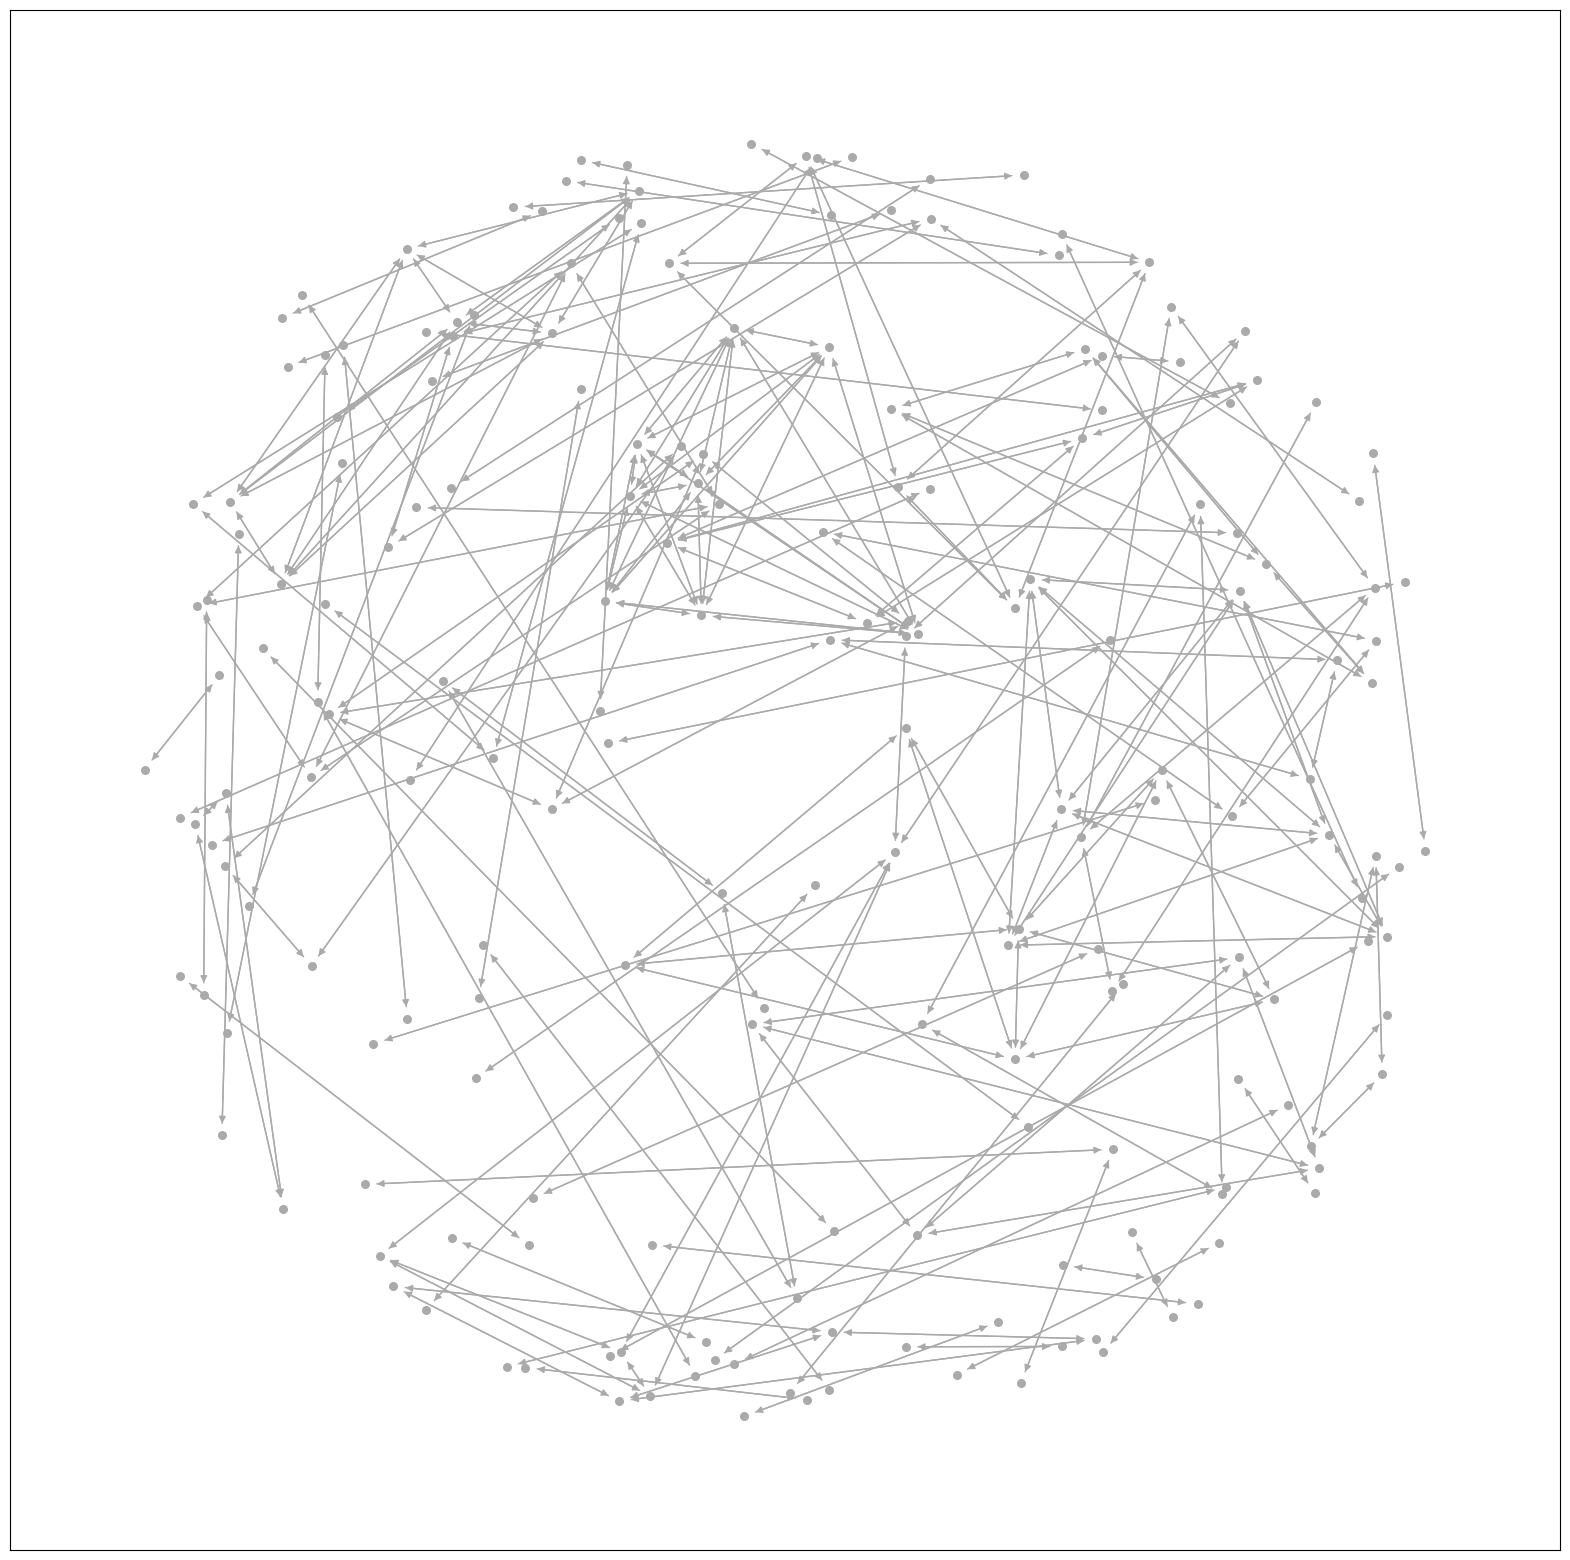

In [15]:
plt.figure(figsize =(20, 20))
layout = nx.spring_layout(collab_graph, k = 0.7)

nx.draw_networkx_edges(collab_graph, layout, edge_color = '#AAAAAA')

uni_dots = [node for node in collab_graph.nodes() 
            if node in collab_df[["paper_1", "paper_2"]].values]

nx.draw_networkx_nodes(collab_graph, layout, nodelist = uni_dots, 
                       node_size = 30, node_color = '#AAAAAA')

In [17]:
# Calculating eigenvector centrality to test

dict(sorted(nx.eigenvector_centrality(collab_graph).items(), key = lambda item: item[1], reverse = True))

{'2ewTdePXvT4J': 0.35355338583647355,
 'MhE2YFKf0PgJ': 0.35355338583647355,
 'OAZ2E_sY5h0J': 0.35355338583647355,
 'e2hjiqcvSAIJ': 0.35355338583647355,
 'lxrWmjCWTbAJ': 0.35355338583647355,
 'n5xwgx-DWnMJ': 0.35355338583647355,
 'rm3zH0JXIVMJ': 0.35355338583647355,
 'tbntS1sTcWMJ': 0.35355338583647355,
 '08F3GhK89qUJ': 4.73537269720223e-05,
 '5v3VjZkCMFAJ': 4.73537269720223e-05,
 'FMPQ1E9eDhMJ': 4.73537269720223e-05,
 'O779ktMVcXwJ': 4.73537269720223e-05,
 'c3XsDBS-umsJ': 4.73537269720223e-05,
 'pKwgdP_AfSAJ': 4.73537269720223e-05,
 '8rJIdq7KXe8J': 4.73537269720223e-05,
 '9OrVFcFB5eoJ': 4.73537269720223e-05,
 'A1RiaXuSFgsJ': 4.73537269720223e-05,
 'CqTUOavVW0kJ': 4.73537269720223e-05,
 'Hlt669jmubYJ': 4.73537269720223e-05,
 'rFVaAdj7v-EJ': 4.73537269720223e-05,
 'aepTKRMuS3IJ': 6.798094613407893e-08,
 'oO-dVpcSp5IJ': 6.798094613407893e-08,
 'F3ID4UO2IEMJ': 4.806978800288462e-08,
 'kveBW6b5JWIJ': 4.806978800288462e-08,
 'R5RW7o9DSdQJ': 4.806978800288462e-08,
 'lotv4bg66P4J': 4.806978800

In [18]:
# Calculating in-degree centrality to test

dict(sorted(nx.in_degree_centrality(collab_graph).items(), key = lambda item: item[1], reverse = True))

{'2ewTdePXvT4J': 0.03535353535353536,
 'MhE2YFKf0PgJ': 0.03535353535353536,
 'OAZ2E_sY5h0J': 0.03535353535353536,
 'e2hjiqcvSAIJ': 0.03535353535353536,
 'lxrWmjCWTbAJ': 0.03535353535353536,
 'n5xwgx-DWnMJ': 0.03535353535353536,
 'rm3zH0JXIVMJ': 0.03535353535353536,
 'tbntS1sTcWMJ': 0.03535353535353536,
 '08F3GhK89qUJ': 0.025252525252525256,
 '5v3VjZkCMFAJ': 0.025252525252525256,
 'FMPQ1E9eDhMJ': 0.025252525252525256,
 'O779ktMVcXwJ': 0.025252525252525256,
 'c3XsDBS-umsJ': 0.025252525252525256,
 'pKwgdP_AfSAJ': 0.025252525252525256,
 '1YcH5YgEEMMJ': 0.025252525252525256,
 '8rJIdq7KXe8J': 0.025252525252525256,
 '9OrVFcFB5eoJ': 0.025252525252525256,
 'A1RiaXuSFgsJ': 0.025252525252525256,
 'CqTUOavVW0kJ': 0.025252525252525256,
 'Hlt669jmubYJ': 0.025252525252525256,
 'rFVaAdj7v-EJ': 0.025252525252525256,
 'aepTKRMuS3IJ': 0.025252525252525256,
 'oO-dVpcSp5IJ': 0.025252525252525256,
 '1F1cCFsvrVYJ': 0.020202020202020204,
 '2WwqztJq7GIJ': 0.020202020202020204,
 'JSs9kK8LTLMJ': 0.02020202020202

In [19]:
# Calculating betweenness centrality to test

dict(filter(lambda value: value[1] > 0, 
            dict(sorted(nx.betweenness_centrality(collab_graph, normalized = True, endpoints = True).items(), 
                        key = lambda item: item[1], reverse = True)).items()))

{'1YcH5YgEEMMJ': 0.0005583472920156337,
 'XkWqVRksXioJ': 0.0005583472920156337,
 'YIusikc05fEJ': 0.00045682960255824577,
 'UPmLHoforA4J': 0.00038069133546520483,
 '2ewTdePXvT4J': 0.0003553119131008578,
 'MhE2YFKf0PgJ': 0.0003553119131008578,
 'OAZ2E_sY5h0J': 0.0003553119131008578,
 'e2hjiqcvSAIJ': 0.0003553119131008578,
 'lxrWmjCWTbAJ': 0.0003553119131008578,
 'n5xwgx-DWnMJ': 0.0003553119131008578,
 'rm3zH0JXIVMJ': 0.0003553119131008578,
 'tbntS1sTcWMJ': 0.0003553119131008578,
 'aepTKRMuS3IJ': 0.0003553119131008578,
 'oO-dVpcSp5IJ': 0.0003553119131008578,
 '08F3GhK89qUJ': 0.00025379422364346985,
 '5v3VjZkCMFAJ': 0.00025379422364346985,
 'FMPQ1E9eDhMJ': 0.00025379422364346985,
 'O779ktMVcXwJ': 0.00025379422364346985,
 'c3XsDBS-umsJ': 0.00025379422364346985,
 'pKwgdP_AfSAJ': 0.00025379422364346985,
 'AwoeeTUDB84J': 0.00025379422364346985,
 'EA_EySpyi_IJ': 0.00025379422364346985,
 'oChWJxuHusYJ': 0.00025379422364346985,
 'qHop6UZsSQEJ': 0.00025379422364346985,
 'vMIcRPf5kgoJ': 0.000253794

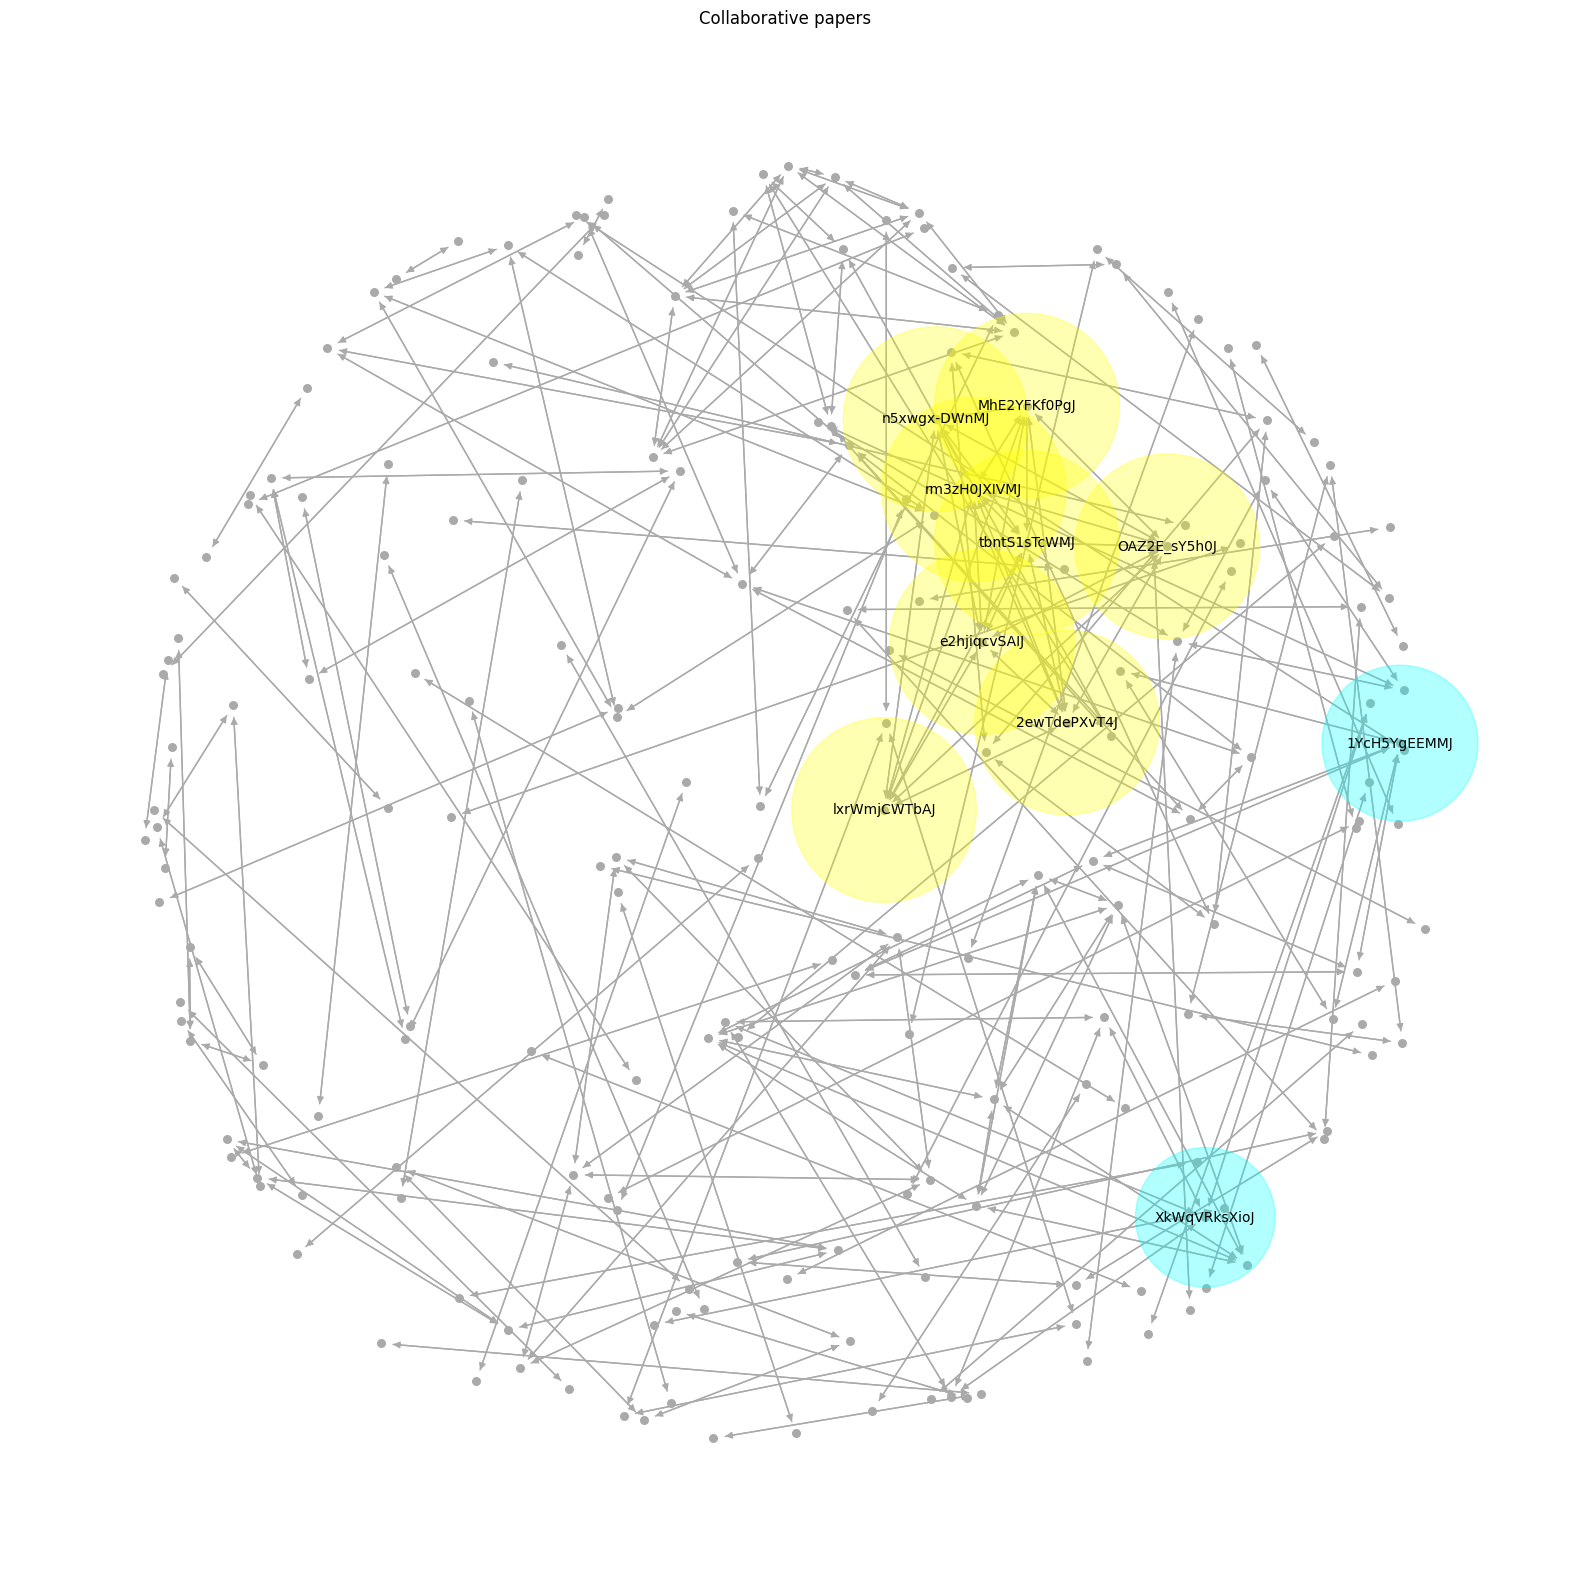

In [16]:
plt.figure(figsize =(20, 20))
layout = nx.spring_layout(collab_graph, k = 0.7)

nx.draw_networkx_edges(collab_graph, layout, edge_color = '#AAAAAA')

uni_dots = [node for node in collab_graph.nodes() 
            if node in collab_df[["paper_1", "paper_2"]].values]

nx.draw_networkx_nodes(collab_graph, layout, nodelist = uni_dots, 
                       node_size = 30, node_color = '#AAAAAA')

# Calculating different centralities

eig_dict = dict(filter(lambda value: value[1] > 0.0005, 
                       dict(sorted(nx.eigenvector_centrality(collab_graph).items(), 
                                   key = lambda item: item[1], 
                                   reverse = True)).items()))

inde_dict = dict(filter(lambda value: value[1] > 0.0005, 
                        dict(sorted(nx.in_degree_centrality(collab_graph).items(),
                                    key = lambda item: item[1], 
                                    reverse = True)).items()))

btn_dict = dict(filter(lambda value: value[1] > 0.0005, 
                       dict(sorted(nx.betweenness_centrality(collab_graph, normalized = True, endpoints = True).items(), 
                                   key = lambda item: item[1], 
                                   reverse = True)).items()))

# Finding and mapping intersections

intersection =  [node for node in collab_graph.nodes() 
                 if node in eig_dict.keys()
                 if node in inde_dict.keys() 
                 if node in btn_dict.keys()]

size_intersection = [value * 500000 for (node, value) in nx.in_degree_centrality(collab_graph).items() 
                     if node in intersection]

nx.draw_networkx_nodes(collab_graph, layout, nodelist = intersection, 
                       node_size = size_intersection, node_color = 'purple', alpha = 0.3)

nx.draw_networkx_labels(collab_graph, layout, 
                        labels = dict(zip(list(intersection), list(intersection))),
                        font_size = 12)

# Finding and mapping parts with higher in-degree + between centralities

inde_btn = [node for node in collab_graph.nodes()
            if node not in eig_dict.keys()
            if node in inde_dict.keys()
            if node in btn_dict.keys()]

size_inde_btn = [value * 500000 for (node, value) in nx.in_degree_centrality(collab_graph).items() 
                 if node in inde_btn]

nx.draw_networkx_nodes(collab_graph, layout, nodelist = inde_btn, 
                       node_size = size_inde_btn, node_color = 'aqua', alpha = 0.3)

nx.draw_networkx_labels(collab_graph, layout, 
                        labels = dict(zip(list(inde_btn), list(inde_btn))),
                        font_size = 10)

# Finding and mapping parts with higher eigenvalue + in-degree centralities

eig_inde = [node for node in collab_graph.nodes()
            if node in eig_dict.keys()
            if node in inde_dict.keys()
            if node not in btn_dict.keys()]

size_eig_inde = [value * 500000 for (node, value) in nx.in_degree_centrality(collab_graph).items() 
                 if node in eig_inde]

nx.draw_networkx_nodes(collab_graph, layout, nodelist = eig_inde, 
                       node_size = size_eig_inde, node_color = 'yellow', alpha = 0.3)

nx.draw_networkx_labels(collab_graph, layout, 
                        labels = dict(zip(list(eig_inde), list(eig_inde))),
                        font_size = 10)

# Finding and mapping parts with higher eigenvalue + betweenness centralities

eig_btn = [node for node in collab_graph.nodes()
           if node in eig_dict.keys()
           if node not in inde_dict.keys()
           if node in btn_dict.keys()]

size_eig_btn = [value * 500000 for (node, value) in nx.in_degree_centrality(collab_graph).items() 
                if node in eig_btn]

nx.draw_networkx_nodes(collab_graph, layout, nodelist = eig_btn, 
                       node_size = size_eig_btn, node_color = 'orange', alpha = 0.4)

nx.draw_networkx_labels(collab_graph, layout, 
                        labels = dict(zip(list(eig_btn), list(eig_btn))),
                        font_size = 10)

plt.axis('off')
plt.title("Collaborative papers")

plt.show()

In [20]:
papers_map = {}
for i in range(len(papers)):
    papers_map[papers[i]["result_id"]] = papers[i]["title"]
len(papers_map)

927

In [21]:
papers_map["XkWqVRksXioJ"]

'Systematic mapping of global research on climate and health using machine learning'